<a href="https://colab.research.google.com/github/AmsaShabbi/FinalProject6220Submission/blob/main/Inse6220Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.models
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#data loading and sorting
data=pd.read_csv("/content/Training.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# New Section

In [ ]:
data = data.rename(index=str, columns={"6": "preg"})
data = data.rename(index=str, columns={"148": "gluco"})
data = data.rename(index=str, columns={"72": "bp"})
data = data.rename(index=str, columns={"35": "stinmm"})
data = data.rename(index=str, columns={"0": "insulin"})
data = data.rename(index=str, columns={"33.6": "mass"})
data = data.rename(index=str, columns={"0.627": "dpf"})
data = data.rename(index=str, columns={"50": "age"})
data = data.rename(index=str, columns={"1": "target"})

data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

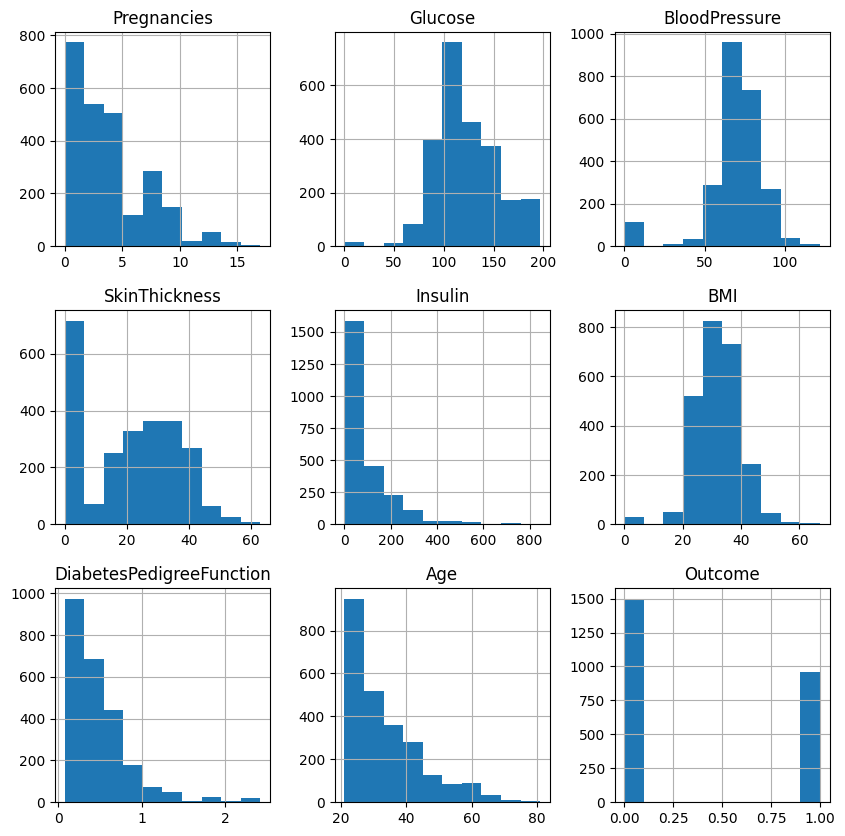

<ipython-input-3-82ed263dc87a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Outcome'],palette='Set1')


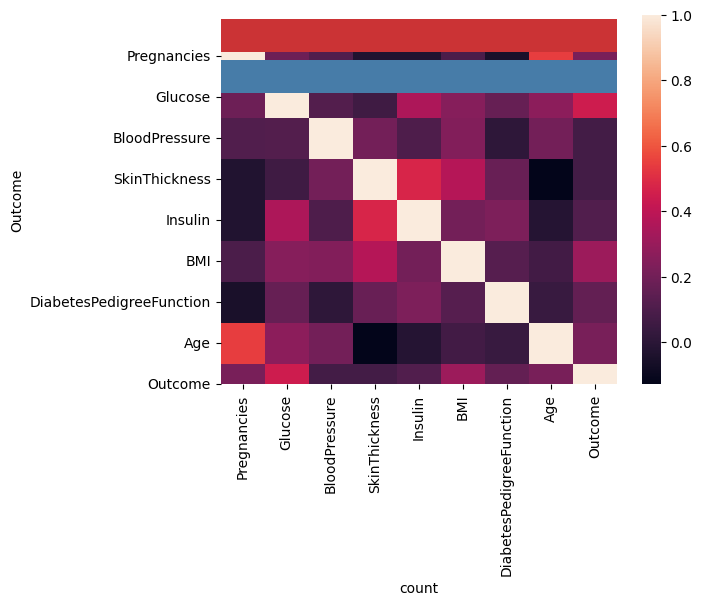

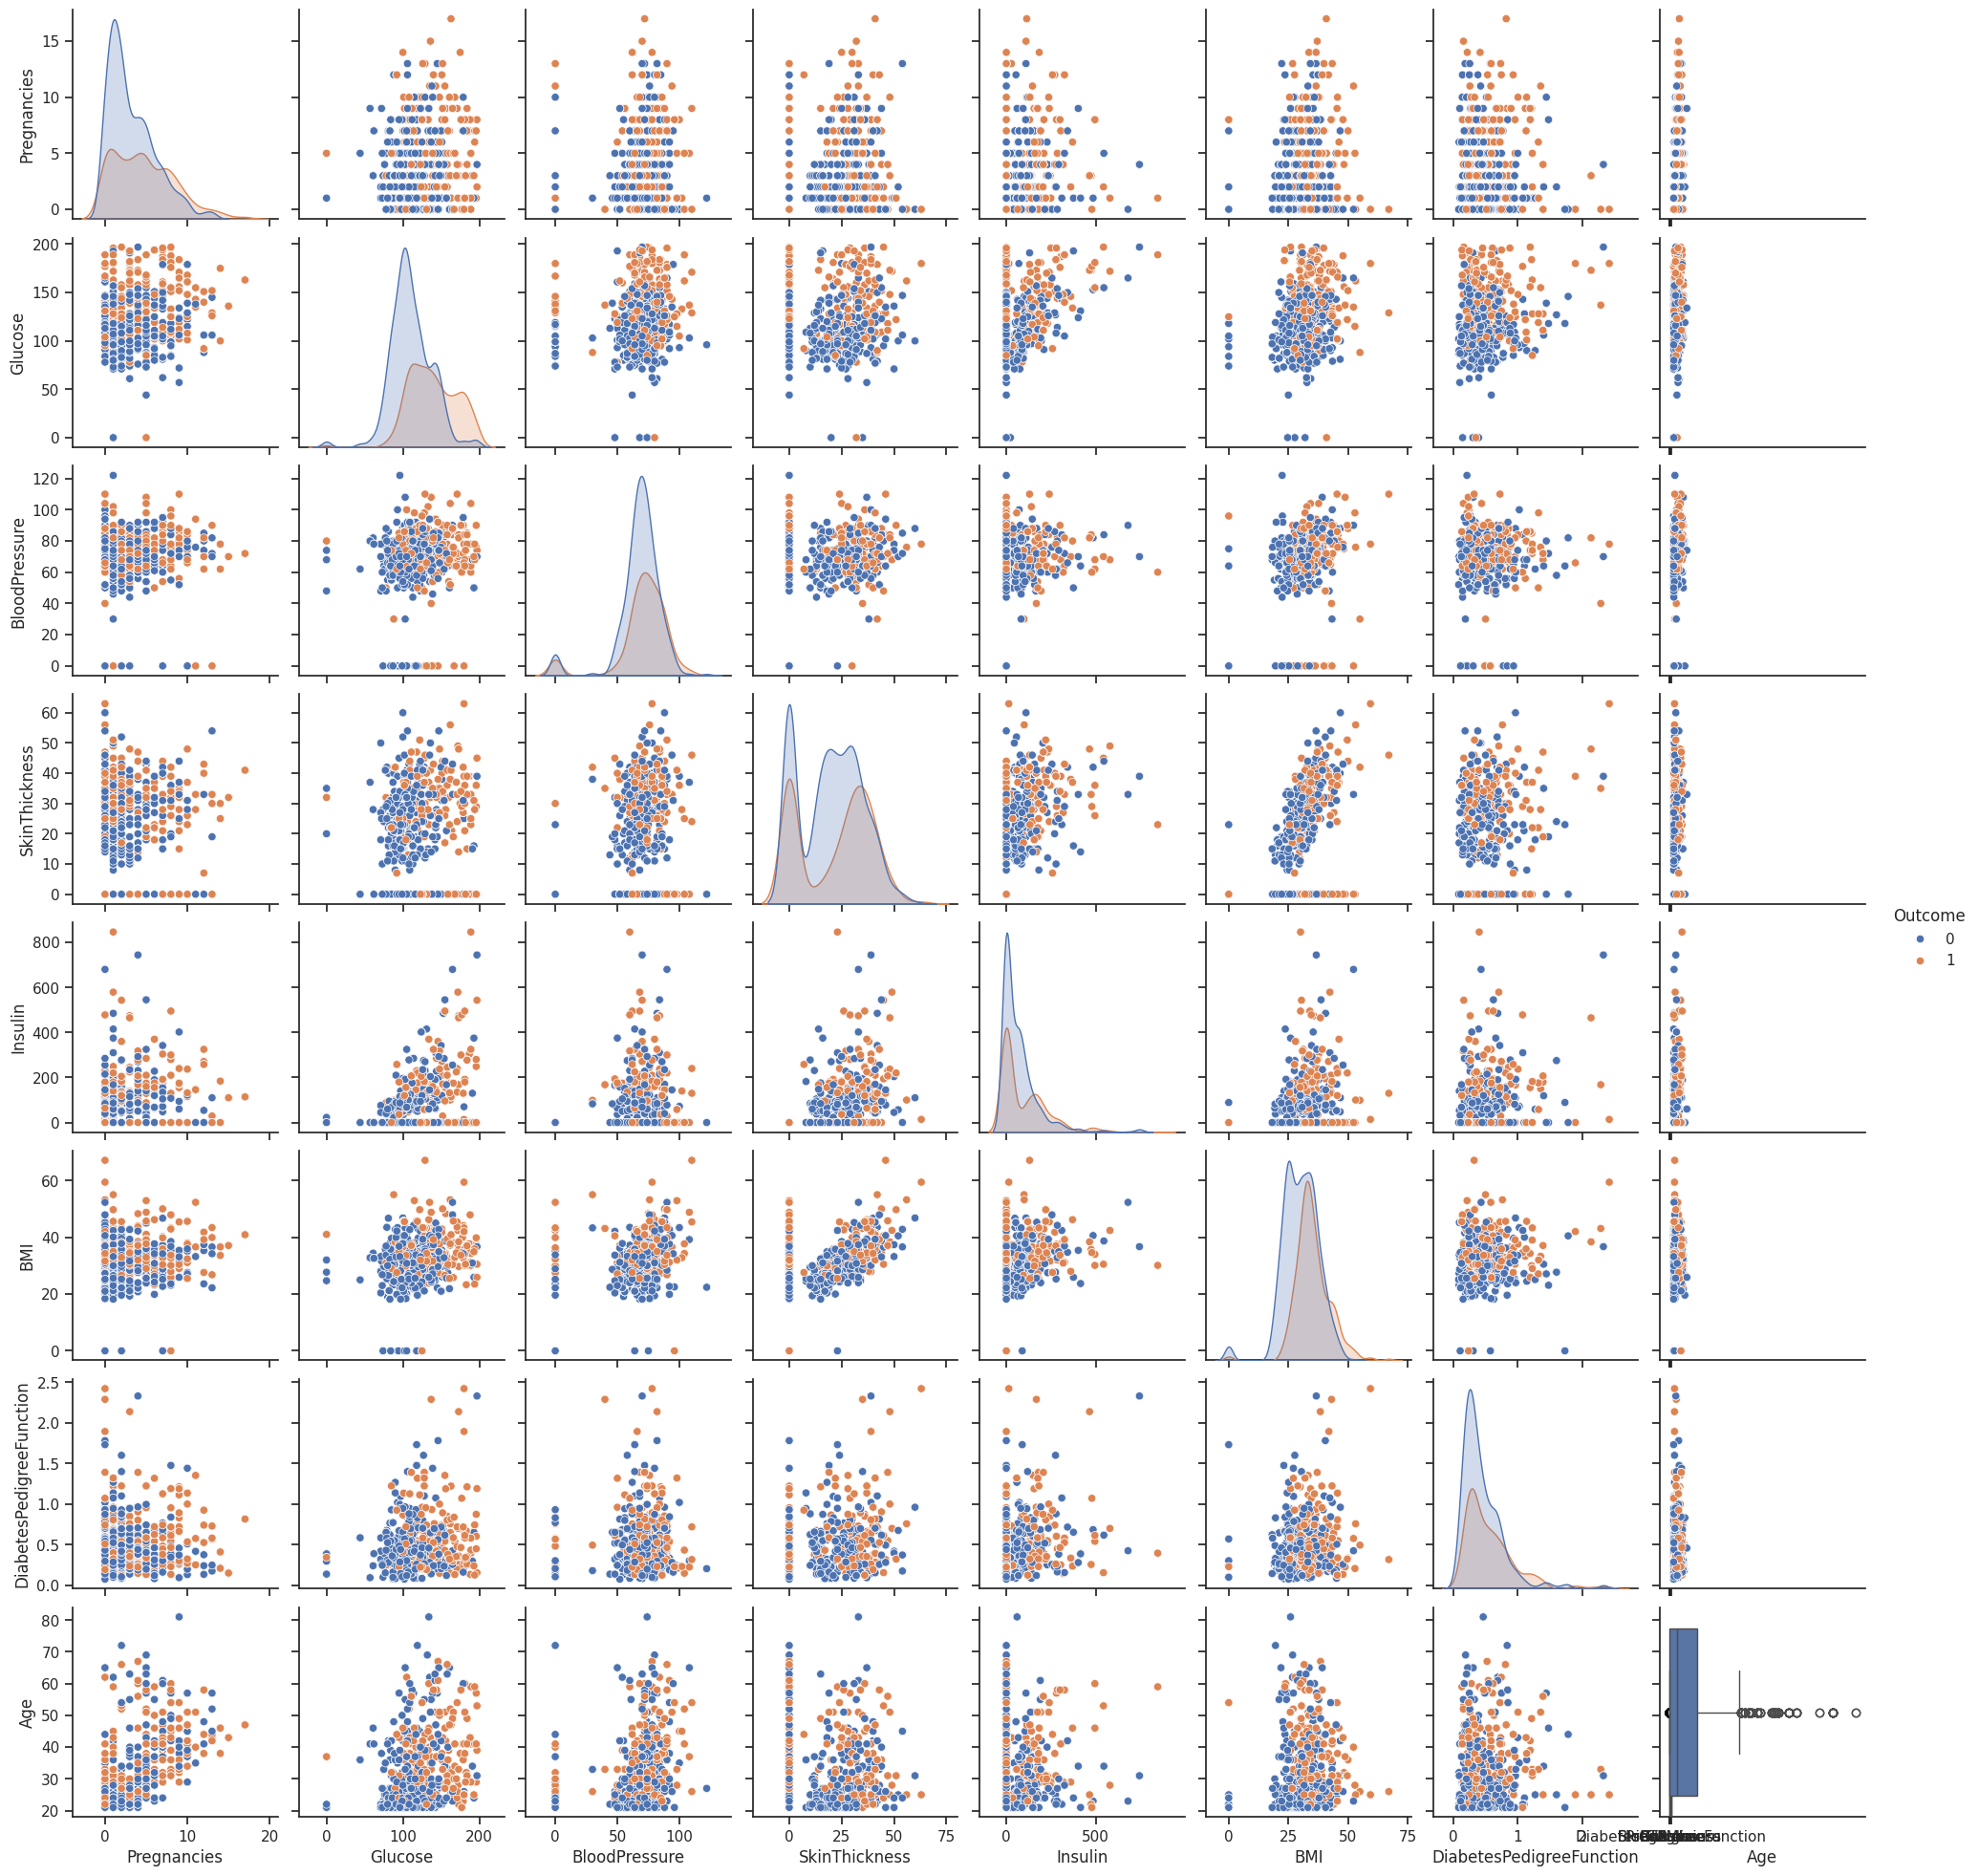

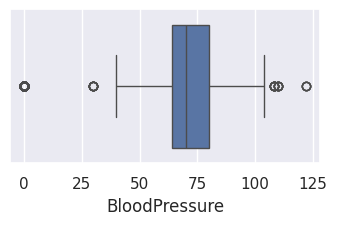

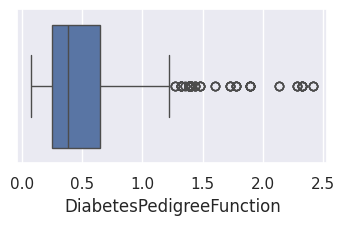

In [ ]:
#histogram creation
data.hist(bins=10,figsize=(10,10))
plt.show()

sns.heatmap(data.corr())

sns.countplot(y=data['Outcome'],palette='Set1')

sns.set(style="ticks")
sns.pairplot(data, hue="Outcome")
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=data['Insulin'])
plt.show()
sns.boxplot(x=data['BloodPressure'])
plt.show()
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.show()

---Q1--- 
 Pregnancies                   1.00000
Glucose                     100.00000
BloodPressure                64.00000
SkinThickness                 0.00000
Insulin                       0.00000
BMI                          27.10000
DiabetesPedigreeFunction      0.25175
Age                          24.00000
Outcome                       0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     142.000
BloodPressure                80.000
SkinThickness                33.000
Insulin                     129.000
BMI                          36.500
DiabetesPedigreeFunction      0.647
Age                          39.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.00000
Glucose                      42.00000
BloodPressure                16.00000
SkinThickness                33.00000
Insulin                     129.00000
BMI                           9.40000
DiabetesPedigreeF

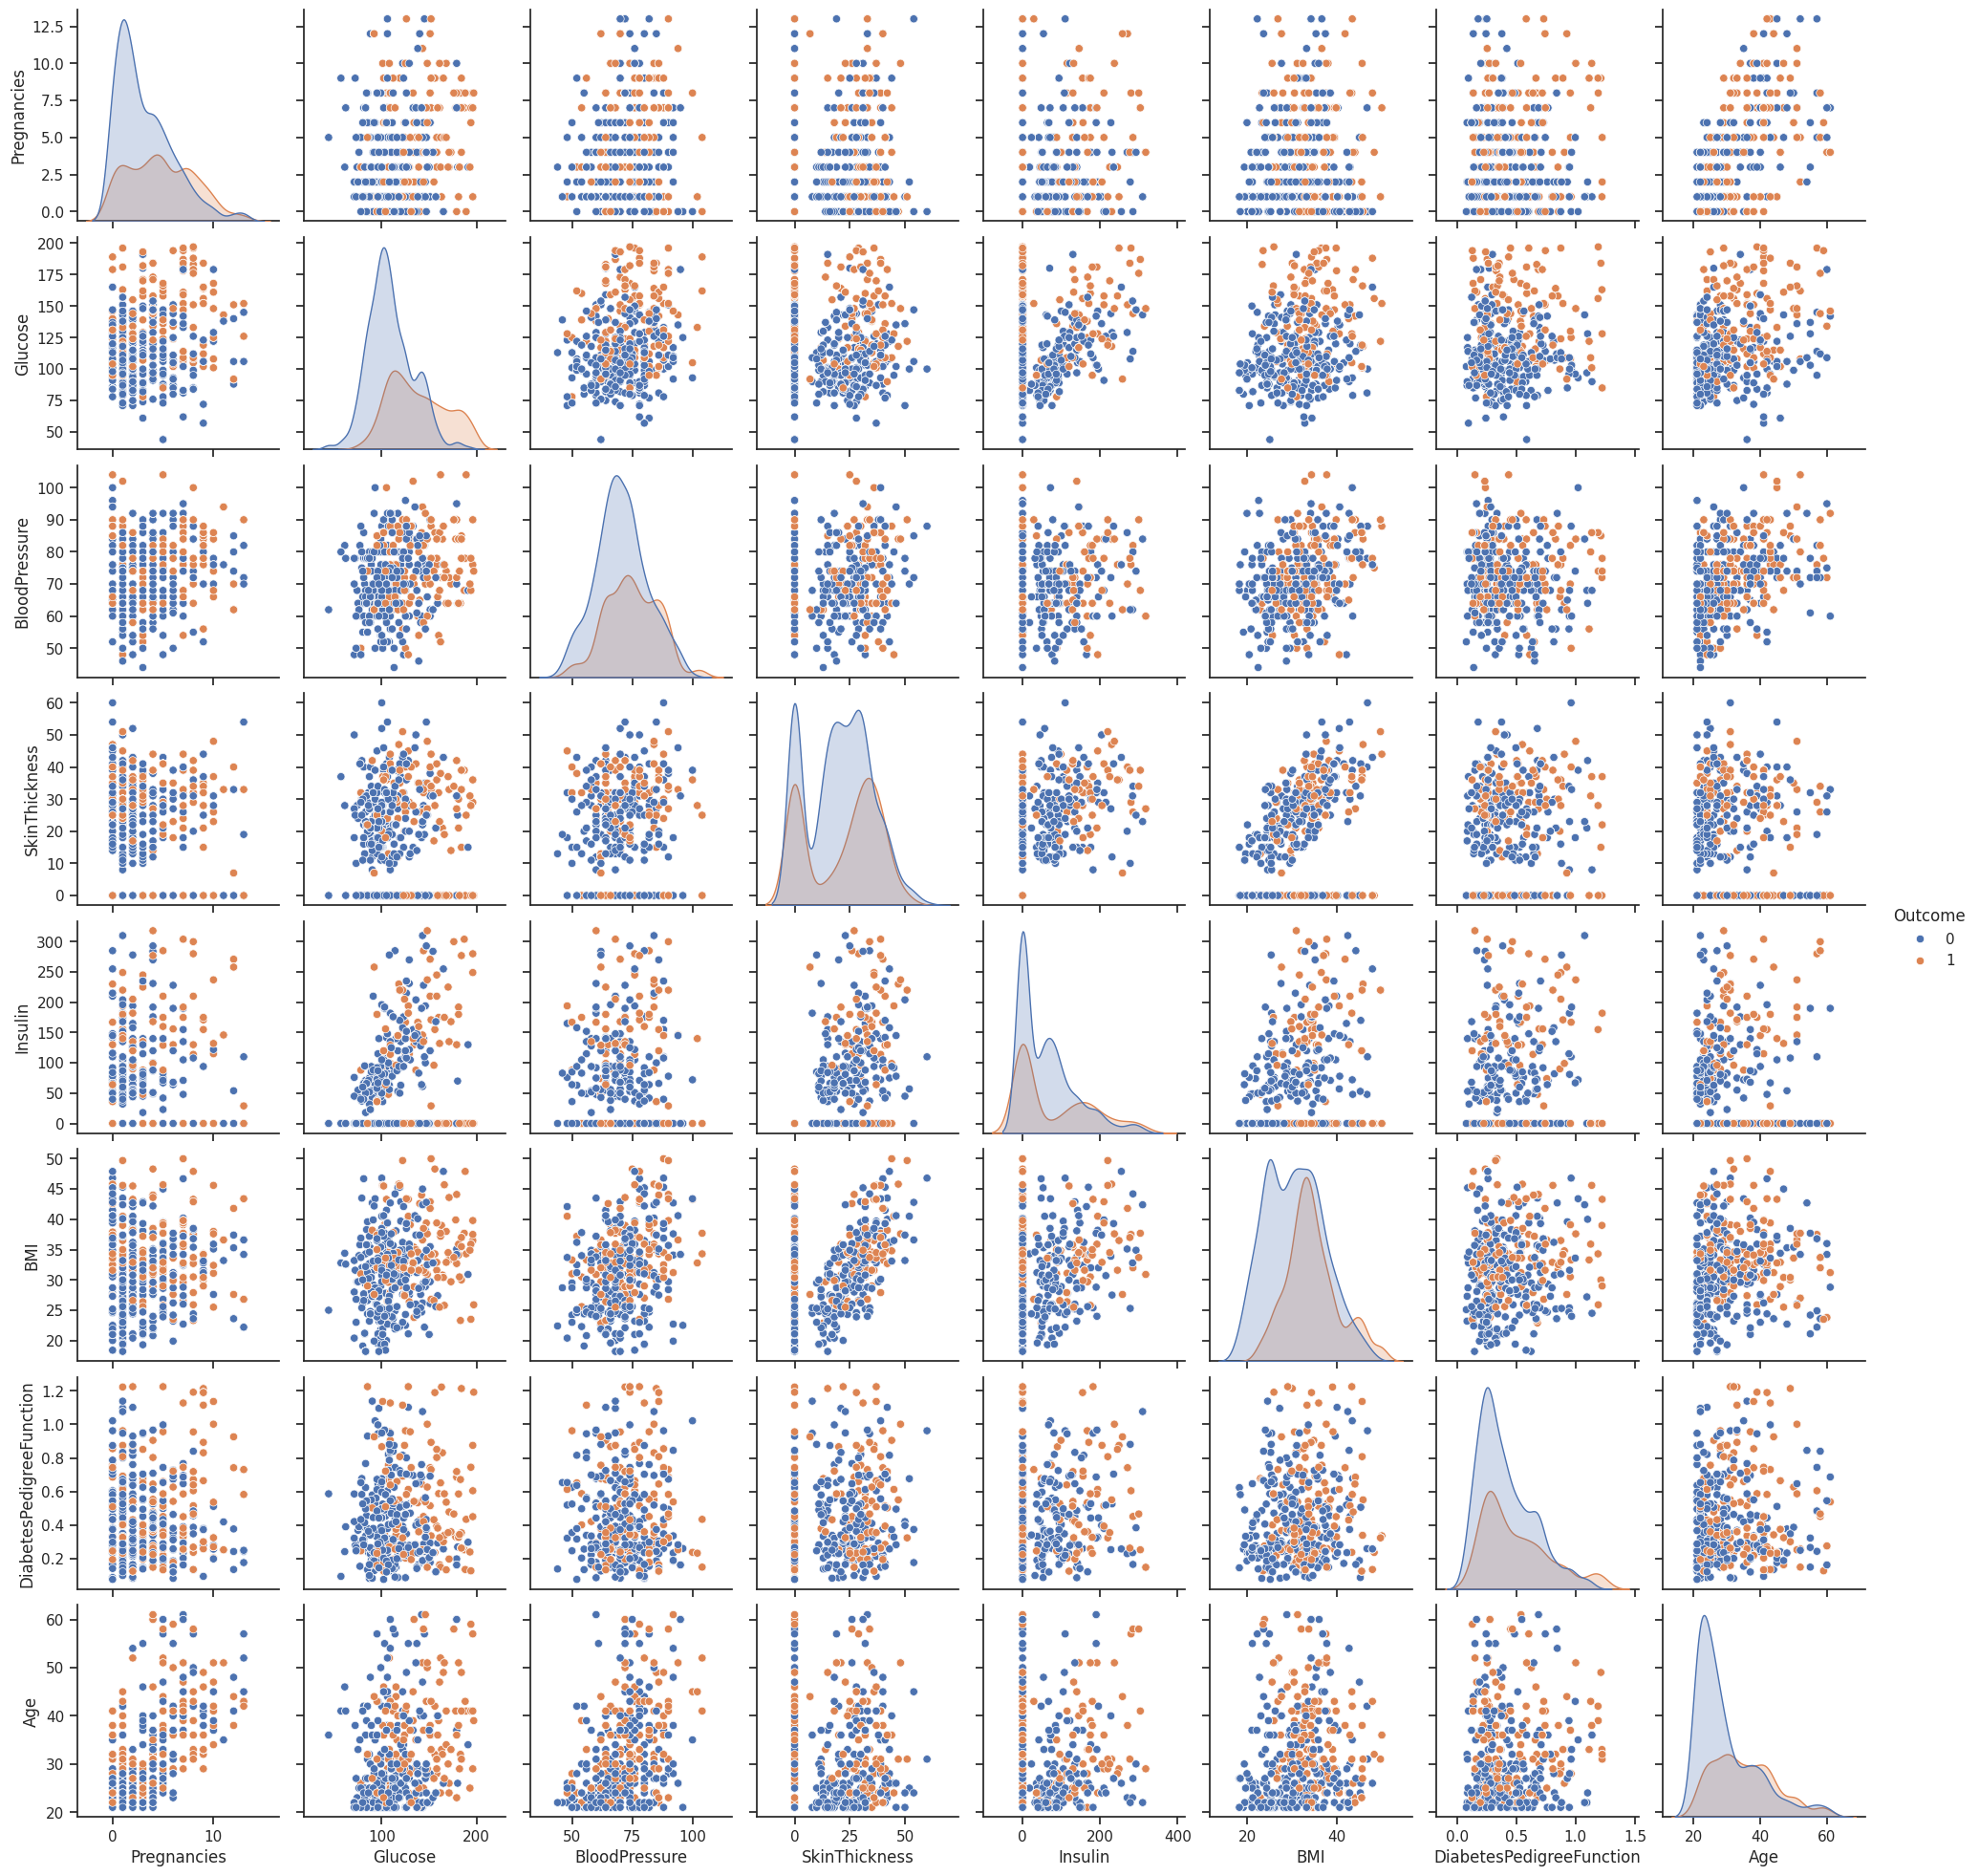

In [ ]:
# quartile ranges
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,df_out.shape

sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']


In [ ]:
#traning validation and modeling
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=['accuracy'])
model_history = model.fit(X_train, y_train, epochs=2000, validation_data=(X_valid, y_valid))



Epoch 1/2000
44/44 [==============================] - 2s 15ms/step - loss: 0.6805 - accuracy: 0.6001 - val_loss: 0.6745 - val_accuracy: 0.6104
Epoch 2/2000
44/44 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.6211 - val_loss: 0.6606 - val_accuracy: 0.6104
Epoch 3/2000
44/44 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6471 - val_loss: 0.6480 - val_accuracy: 0.6320
Epoch 4/2000
44/44 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6471 - val_loss: 0.6373 - val_accuracy: 0.6364
Epoch 5/2000
44/44 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6544 - val_loss: 0.6268 - val_accuracy: 0.6515
Epoch 6/2000
44/44 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.6580 - val_loss: 0.6167 - val_accuracy: 0.6494
Epoch 7/2000
44/44 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6696 - val_loss: 0.6069 - val_accuracy: 0.6623
Epoch

# New Section

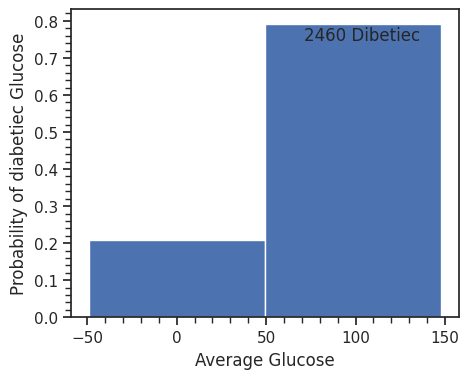

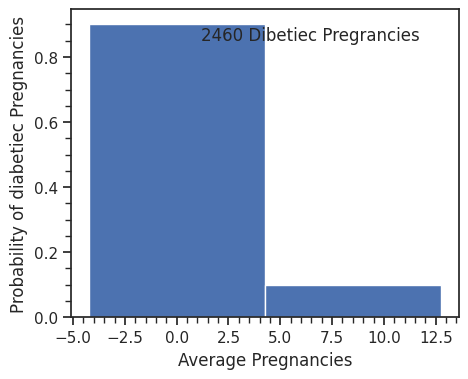

In [ ]:
#probability distribution
import matplotlib.pyplot as plt

data = pd.read_csv("Training.csv", sep=",")
data = data[data.Glucose < 2E4]
H, edges = np.histogram(data.Glucose, bins=2)

plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g Dibetiec" % len(data),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Average Glucose")
ax.set_ylabel("Probability of diabetiec Glucose")
ax.minorticks_on()
plt.show()
X = data.iloc[:, :-1]
Y = data.iloc[:,8]

data = data[data.Pregnancies < 2E4]
H, edges = np.histogram(data.Pregnancies, bins=2)

plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g Dibetiec Pregrancies" % len(data),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Average Pregnancies")
ax.set_ylabel("Probability of diabetiec Pregnancies")
ax.minorticks_on()
plt.show()
X = data.iloc[:, :-1]
Y = data.iloc[:,8]